---
# 1. CNN(Convolution Neural Network) 개념

- convolution(합성곱) : 주변 화소값들에 가중치를 곱해서 더한 후에 이것을 새로운 화소값으로 하는 연산이다.
- kernal(mask) : conv 중 [[1,0,-1],[-1,0,1],[0,1,0]]과 같은 필터. 이미지 데이터와 합성곱을 한다.
- stride : kernal 적용하는 단위(2면 2칸씩 이동하며 kernal적용하여 합성곱!)
- padding : 이미지의 모서리 부분도 conv 하기 위해서 이미지 테두리에 0을 둘러싼다.(안하면 모서리쪽 이미지가 학습되지 않을 수도.)
- max pooling : (= 서브샘플링 방법) 해당 행렬 중 큰 값을 추출하여 입력의 차원을 줄인다.(큰 값 = 색깔 진한 특징 높은 값)

Convolution(합성곱)  
<img width="563" alt="image" src="https://user-images.githubusercontent.com/88031549/200231053-13717646-5eba-4b1c-b2ae-8d14318f6dfc.png">

kernal(mask)  
<img width="398" alt="image" src="https://user-images.githubusercontent.com/88031549/200230842-ac199c65-e82d-4703-aef1-d1529ddf5d4e.png">


Max Pooling(subsampling)  
<img width="457" alt="image" src="https://user-images.githubusercontent.com/88031549/200230937-c7878d5a-46cf-4640-b778-48be13225207.png">

---
# 2. CNN 실습  
손글씨 예제(mnist)

## 2-1. Lib & Data

In [48]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0 
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## 2-2. Modeling

In [49]:
# 컨볼루션 신경망의 설정
model = Sequential()
#conv
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
# 입력
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [50]:
# 모델 최적화 설정 : 모델중간 저장 + 조기종료
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [51]:
# 모델의 실행
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), \
    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.05504, saving model to ./model/01-0.0550.hdf5

Epoch 2: val_loss improved from 0.05504 to 0.03912, saving model to ./model/02-0.0391.hdf5

Epoch 3: val_loss improved from 0.03912 to 0.03789, saving model to ./model/03-0.0379.hdf5

Epoch 4: val_loss improved from 0.03789 to 0.03138, saving model to ./model/04-0.0314.hdf5

Epoch 5: val_loss did not improve from 0.03138

Epoch 6: val_loss improved from 0.03138 to 0.02572, saving model to ./model/06-0.0257.hdf5

Epoch 7: val_loss did not improve from 0.02572

Epoch 8: val_loss did not improve from 0.02572

Epoch 9: val_loss did not improve from 0.02572

Epoch 10: val_loss did not improve from 0.02572

Epoch 11: val_loss did not improve from 0.02572

Epoch 12: val_loss improved from 0.02572 to 0.02496, saving model to ./model/12-0.0250.hdf5

Epoch 13: val_loss did not improve from 0.02496

Epoch 14: val_loss did not improve from 0.02496

Epoch 15: val_loss did not improve from 0.02496

Epoch 16: val

## 2-3. Evaluation

In [52]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.0290 - accuracy: 0.9929

 Test Accuracy: 0.9929


In [53]:
# 테스트 셋의 오차
y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

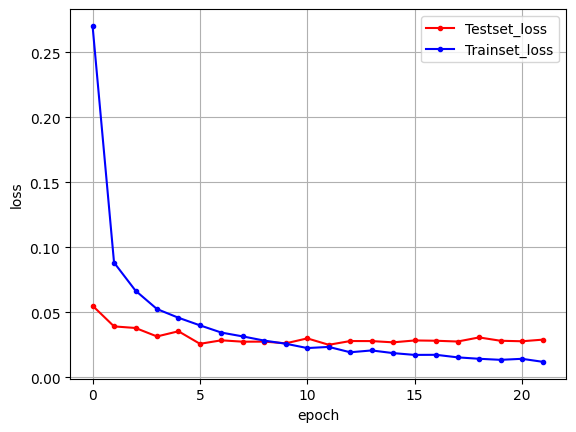

In [54]:
# 오차를 그래프로 표현
X_len = numpy.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(X_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

---
# 3. DNN vs CNN
패션아이템 10가지 구분

## 3-1. DNN으로

### 1) Lib & Data

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 4s 1us/step


### 2) Modeling

In [40]:
# 모델
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.4941 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.3773 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.3360 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.2948 - accuracy: 0.8918


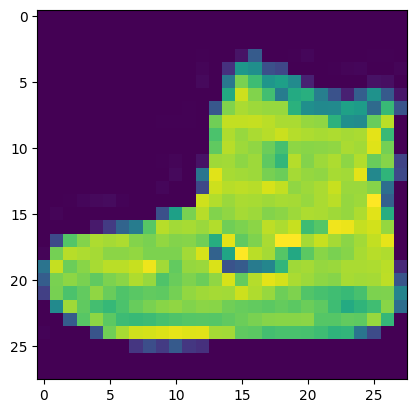

In [42]:
plt.imshow(train_images[0])

## 3-2. CNN으로

### 1) Lib & Data

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) # CNN에 넣으려면 reshape해줘야함.
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images / 255.0

### 2) Modeling

In [56]:
model = models.Sequential()
# conv(합성곱)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 입력층 & 히든층 & 출력층
model.add(layers.Flatten()) # 합성곱해준 행열(28,28,1)을 1차원으로 바꾸어 입력
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
# 모델 최적화 설정 : 모델중간 저장 + 조기종료
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [58]:
# 모델의 실행
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), \
    epochs=5, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.47350, saving model to ./model/01-0.4735.hdf5

Epoch 2: val_loss improved from 0.47350 to 0.38089, saving model to ./model/02-0.3809.hdf5

Epoch 3: val_loss improved from 0.38089 to 0.34694, saving model to ./model/03-0.3469.hdf5

Epoch 4: val_loss improved from 0.34694 to 0.32547, saving model to ./model/04-0.3255.hdf5

Epoch 5: val_loss improved from 0.32547 to 0.30970, saving model to ./model/05-0.3097.hdf5


### 3) Evaluation

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.8904
정확도: 0.8903999924659729


In [60]:
# 테스트 셋의 오차
y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

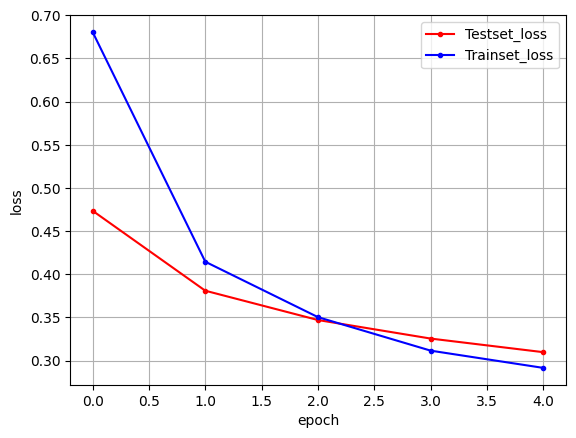

In [61]:
# 오차를 그래프로 표현
X_len = numpy.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(X_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

> DNN의 test acc = 0.8918.  
> CNN의 test acc = 0.9051.   
> CNN이 학습이 더 잘 된다.

참고 : https://twinw.tistory.com/252
